# Курсовой проект для курса "Алгоритмы анализа данных"

Задание: Примите участие в одном или двух соревнованиях и пришлите свой псевдоним на Kaggle и ссылку на github с решением соревнования по регрессии (https://www.kaggle.com/c/tutors-expected-math-exam-results) или классификации (https://www.kaggle.com/c/choose-tutors).

В скрипте можно использовать только эти импорты:  
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt  
import seaborn as sns

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Вспомогательные функции

In [2]:
def normalize(df, name):
    return (df[name] - df[name].min()) / (df[name].max() - df[name].min())

In [3]:
def distribution_chart(df, name):
    sns.distplot(df[name])
    plt.title(name)
    plt.show()

In [4]:
def show_correlations(df):
    plt.figure(figsize = (20,16))
    sns.set(font_scale=1.4)
    sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')
    plt.title('Корреляционная матрица')
    plt.show()

In [5]:
def show_correlation(df, name_one, name_two):
    print(np.cov(df[name_one], df[name_two]))
    grid = sns.jointplot(df[name_one], X_train_norm[name_two], kind='kde')
    grid.fig.set_figwidth(12)
    grid.fig.set_figheight(12)
    plt.show()

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def log_loss(w, X, y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X))
    loss = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / m * np.dot(X, (A - y).T)
    return loss, grad

In [9]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)
    return w, losses

In [10]:
def predict(w, X):
    m = X.shape[1]
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X))
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_predicted[:, i] = 0
    
    return y_predicted

Описание датасета:

| Наименование поля | Индекс | Описание |
|---|:---:|:---|
| Id  | 0 | идентификатор |
| age | 1 | возраст |
| years_of_experience | 2 | опыт работы |
| lesson_price | 3 | цена |
| qualification | 4 | квалификация |
| physics | 5 | ведет физику |
| chemistry | 6 | ведет химию |
| biology | 7 | ведет биологию |
| english | 8 | ведет английский |
| geography | 9 | ведет географию |
| history | 10 | ведет историю |
| mean_exam_points | 11 | средний балл за ЕГЭ |
| choose | 12 | подходимость |

In [11]:
df_train = pd.read_csv('data/choose-tutors/train.csv', sep=',',header=0)

Посмотрим свойства нашего датасета

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [13]:
df_train['choose'] = df_train['choose'].astype('float64')

В общем-то все нужные признаки без пропусков и нужного типа.

Посмотрим целевую переменную.

In [14]:
df_train['choose'].value_counts()

0.0    8891
1.0    1109
Name: choose, dtype: int64

In [15]:
target_variable = df_train['choose'].values

Удалим столбцы ненужные в обучении.

In [16]:
del df_train['Id']
del df_train['choose']

Посмотрим статистику нашего датасета.

In [17]:
df_train.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200
std,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024
min,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000
50%,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000
max,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000


Очевидно, что надо отмасштабировать следующие признаки датасета:
- age
- years_of_experience
- lesson_price
- qualification
- mean_exam_points

Поскольку остальные поля находятся в диапазоне от 0 до 1, то нормализуем наш датасет.

In [18]:
X_train_norm = df_train.copy()

X_train_norm['age'] = normalize(df_train, 'age')
X_train_norm['years_of_experience'] = normalize(df_train, 'years_of_experience')
X_train_norm['lesson_price'] = normalize(df_train, 'lesson_price')
X_train_norm['qualification'] = normalize(df_train, 'qualification')
X_train_norm['mean_exam_points'] = normalize(df_train, 'mean_exam_points')

Проверим, что получилось.

In [19]:
X_train_norm.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.506687,0.219422,0.400651,0.241433,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,0.469182
std,0.178451,0.196320,0.139677,0.266282,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,0.202911
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.377778,0.000000,0.293333,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.328358
50%,0.511111,0.222222,0.360000,0.333333,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.447761
75%,0.622222,0.333333,0.520000,0.333333,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.611940
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


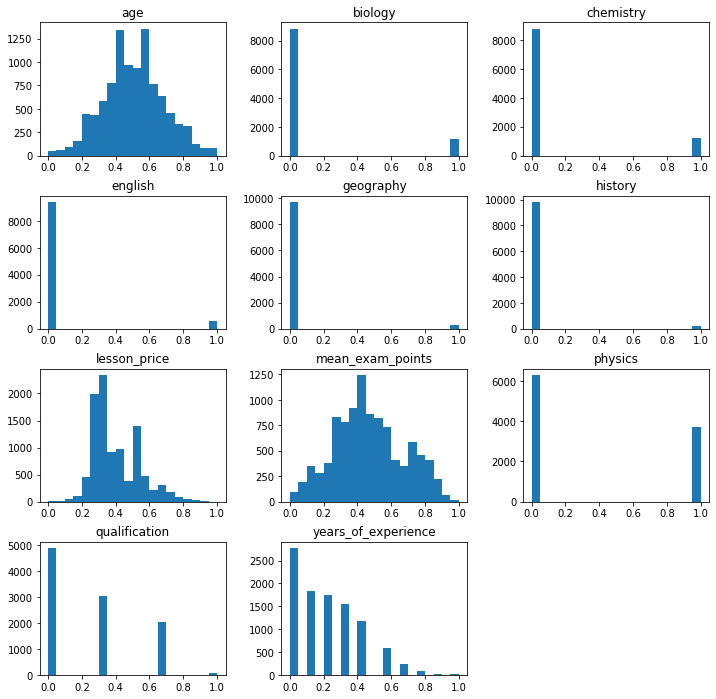

In [20]:
X_train_norm.hist(figsize=(12,12), bins=20, grid=False);

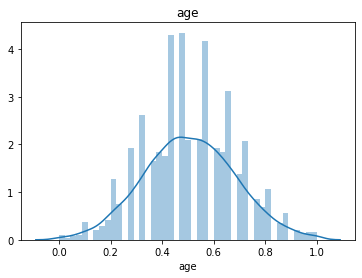

In [21]:
distribution_chart(X_train_norm, 'age')

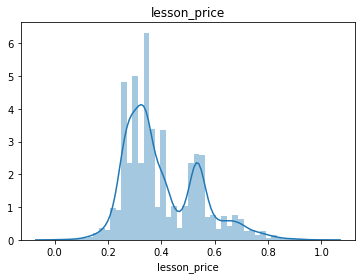

In [22]:
distribution_chart(X_train_norm, 'lesson_price')

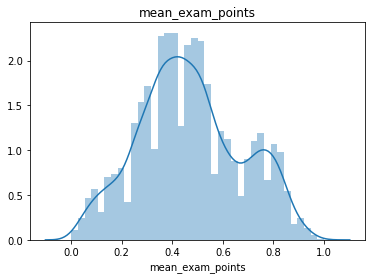

In [23]:
distribution_chart(X_train_norm, 'mean_exam_points')

Посмотрим корреляции, возможно получиться избавится от лишних показателей.

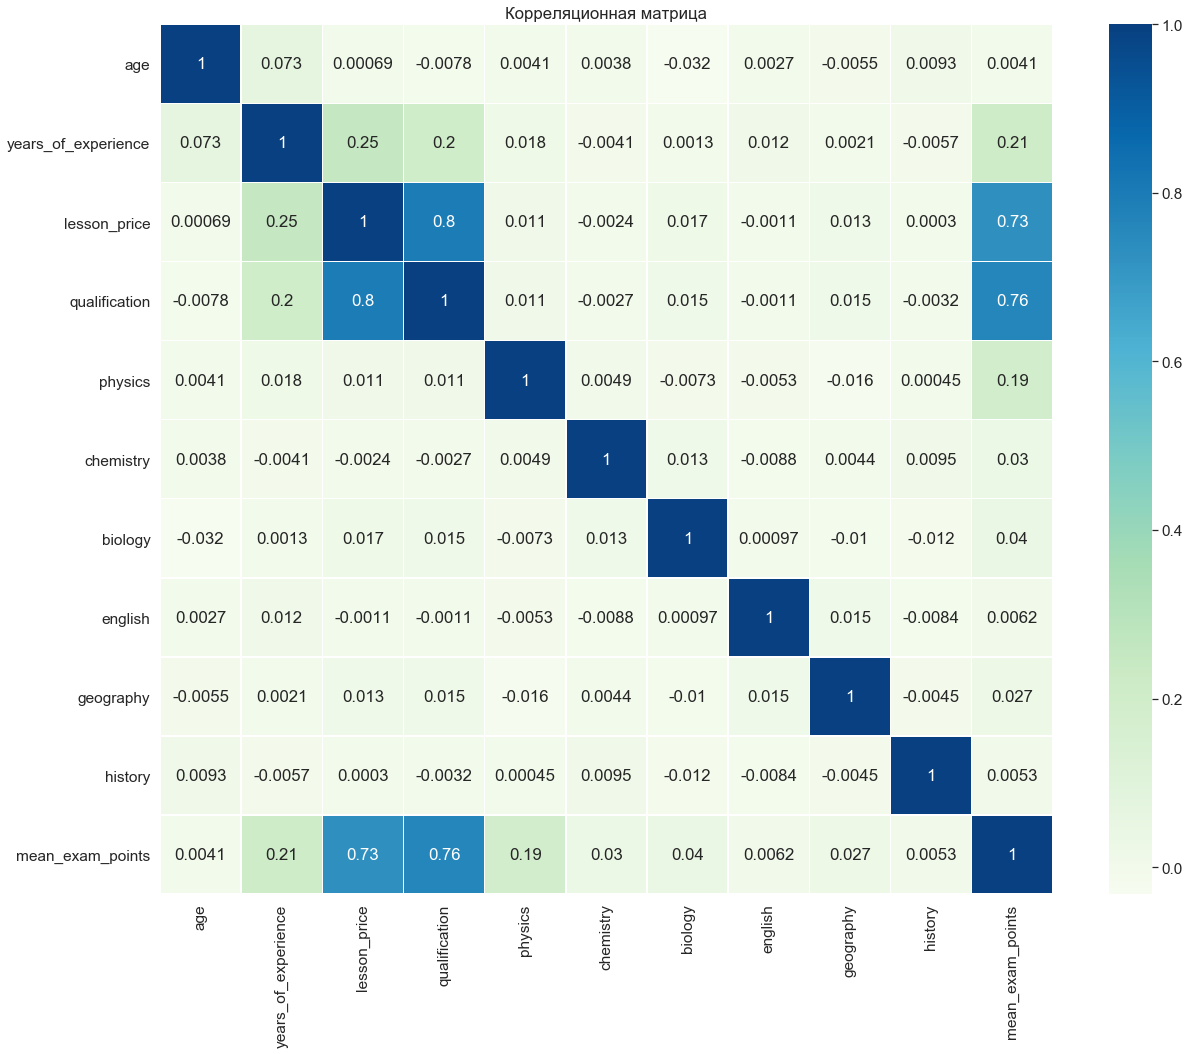

In [24]:
show_correlations(X_train_norm)

Видно, что баллы за ЕГЭ достаточно сильно коррелирует с ценой обучения и квалификацией преподавателя.

[[0.0411728  0.02066739]
 [0.02066739 0.01950969]]


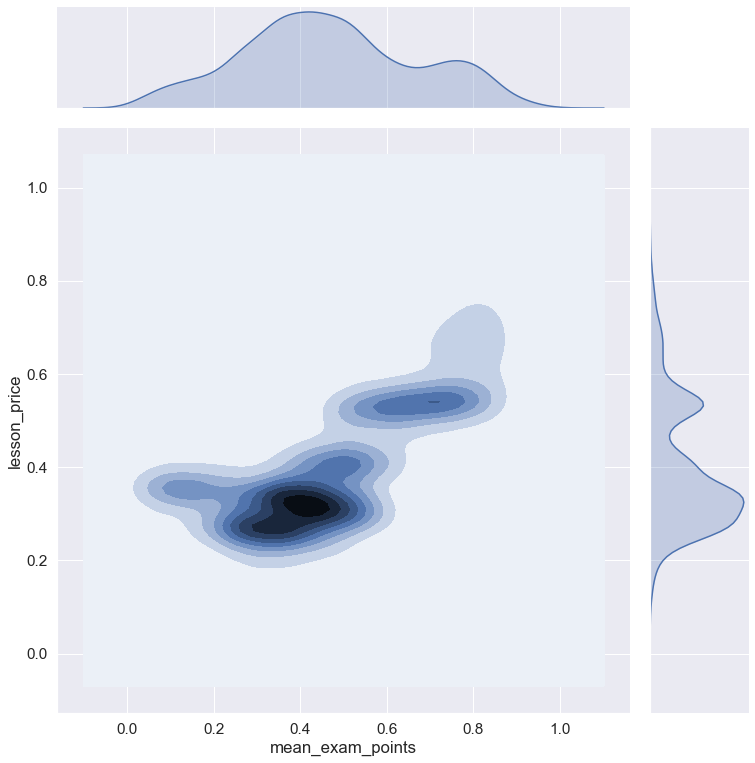

In [25]:
show_correlation(X_train_norm, 'mean_exam_points', 'lesson_price')

[[0.0411728  0.0412737 ]
 [0.0412737  0.07090593]]


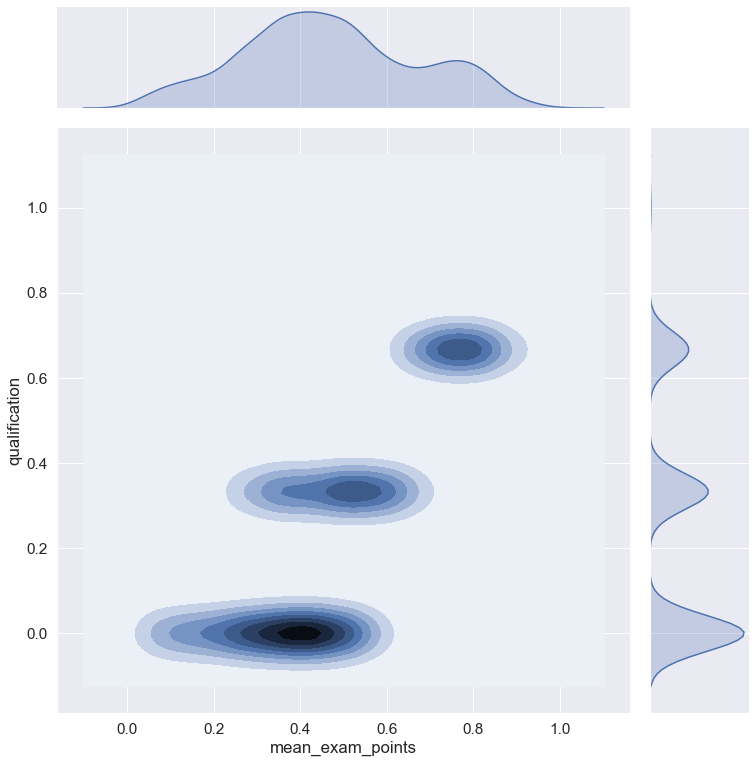

In [26]:
show_correlation(X_train_norm, 'mean_exam_points', 'qualification')

[[0.01950969 0.02965743]
 [0.02965743 0.07090593]]


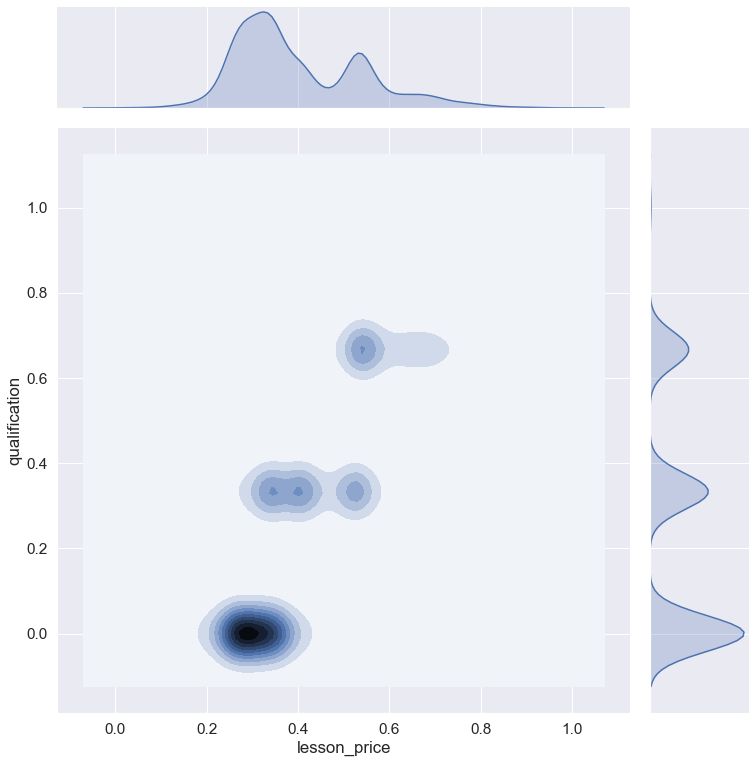

In [27]:
show_correlation(X_train_norm, 'lesson_price', 'qualification')

Подготовим проверочные данные.

In [28]:
df_test = pd.read_csv('data/choose-tutors/test.csv', sep=',',header=0)

In [29]:
df_test.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14999.50000,45.924500,1.985700,1699.910000,1.702300,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,64.149400
std,2886.89568,8.031977,1.771217,526.260094,0.789644,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,13.570096
min,10000.00000,23.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,12499.75000,41.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,14999.50000,46.000000,2.000000,1550.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,17499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,19999.00000,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000


In [30]:
X_test_norm = df_test.copy()

X_test_norm['age'] = normalize(df_test, 'age')
X_test_norm['years_of_experience'] = normalize(df_test, 'years_of_experience')
X_test_norm['lesson_price'] = normalize(df_test, 'lesson_price')
X_test_norm['qualification'] = normalize(df_test, 'qualification')
X_test_norm['mean_exam_points'] = normalize(df_test, 'mean_exam_points')

In [31]:
del X_test_norm['Id']

In [32]:
X_test_norm.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.509433,0.220633,0.383537,0.234100,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,0.487112
std,0.178488,0.196802,0.144181,0.263215,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,0.205608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.273973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348485
50%,0.511111,0.222222,0.342466,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.469697
75%,0.622222,0.333333,0.506849,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.621212
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_test_norm_tr = X_test_norm.transpose()

Разобъем датасет на тренировочную и тестовую часть тестовую

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train_norm, 
                                                    target_variable, 
                                                    test_size=0.33, 
                                                    shuffle=True, 
                                                    random_state=21)

Иницилизируем начальный вектор весов.

In [35]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [36]:
w0 = np.zeros((X_train_tr.shape[0], 1))

Тренируем нашу модель.

In [37]:
n_iterations = 1000
eta = 0.05
w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

In [38]:
y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-1.56787999]
 [-0.55142953]
 [-1.48720357]
 [-0.19381709]
 [ 0.30753001]
 [ 0.06938188]
 [-0.00806801]
 [-0.11907874]
 [-0.05819283]
 [-0.07667243]
 [-0.94725945]]
Точность на обучающей выборке: 88.851
Точность на тестовой выборке: 89.030


In [39]:
y_predicted_test_test = predict(w, X_test_norm_tr)

In [41]:
df_res = pd.DataFrame({'Id':list(df_test['Id']),'choose':list(y_predicted_test_test[0])})

In [44]:
df_res.describe()

,Id,choose
count,10000.00000,10000.0
mean,14999.50000,0.0
std,2886.89568,0.0
min,10000.00000,0.0
25%,12499.75000,0.0
50%,14999.50000,0.0
75%,17499.25000,0.0
max,19999.00000,0.0


In [42]:

df_res.to_csv('data/choose-tutors/submission_log.csv', index=False, encoding='utf-8')